# Predicting the final grade of a student

The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (Decision Trees)

# Decision Tree & Random Forest Implementation in python

### Import the relevent Modules

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [136]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 1. Exploratory Data Analysis

In [137]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [138]:
pd.set_option("display.float_format", "{:.2f}".format)
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [139]:
categorical_col = []
for column in student.columns:
    if student[column].dtype == object and len(student[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {student[column].unique()}")
        print("====================================")
    else:
        x=column
        student[x] = student[x].astype("category").cat.codes
        print(f"{column} : {student[column].unique()}")
        print("====================================")

school : ['GP' 'MS']
sex : ['F' 'M']
age : [3 2 0 1 4 7 5 6]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [1 0 2 3]
studytime : [1 2 0 3]
failures : [0 3 2 1]
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']
famrel : [3 4 2 0 1]
freetime : [2 1 3 0 4]
goout : [3 2 1 0 4]
Dalc : [0 1 4 2 3]
Walc : [0 2 1 3 4]
health : [2 4 0 1 3]
absences : [ 6  4 10  2  0 16 14  7  8 25 12 31 18 26 20 32 24 27  5 13 15 22  3 21
  1 33 28 19  9 11 29 30 23 17]
G1 : [ 2  4 12  3  9 13 11  7 10  5  8  6 14 16 15  1  0]
G2 : [ 3  2  5 11  7 12  9 15 13 10  6  8  4 16 14  1  0]
G3 : [ 3  7 12  8 16  6  9 11

In [140]:
student.drop(['G1', 'G2'], axis="columns", inplace=True)

In [141]:
student['G3'] = student.G3.astype("category").cat.codes

In [142]:
student['G3']

0       3
1       3
2       7
3      12
4       7
       ..
390     6
391    13
392     4
393     7
394     6
Name: G3, Length: 395, dtype: int8

### 2. Data Visualisation

In [143]:
student.G3.value_counts()

7     56
8     47
0     38
12    33
5     32
10    31
9     31
6     28
11    27
13    16
3     15
15    12
4      9
2      7
14     6
16     5
1      1
17     1
Name: G3, dtype: int64

C:\Users\Zeus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zeus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zeus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Zeus\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

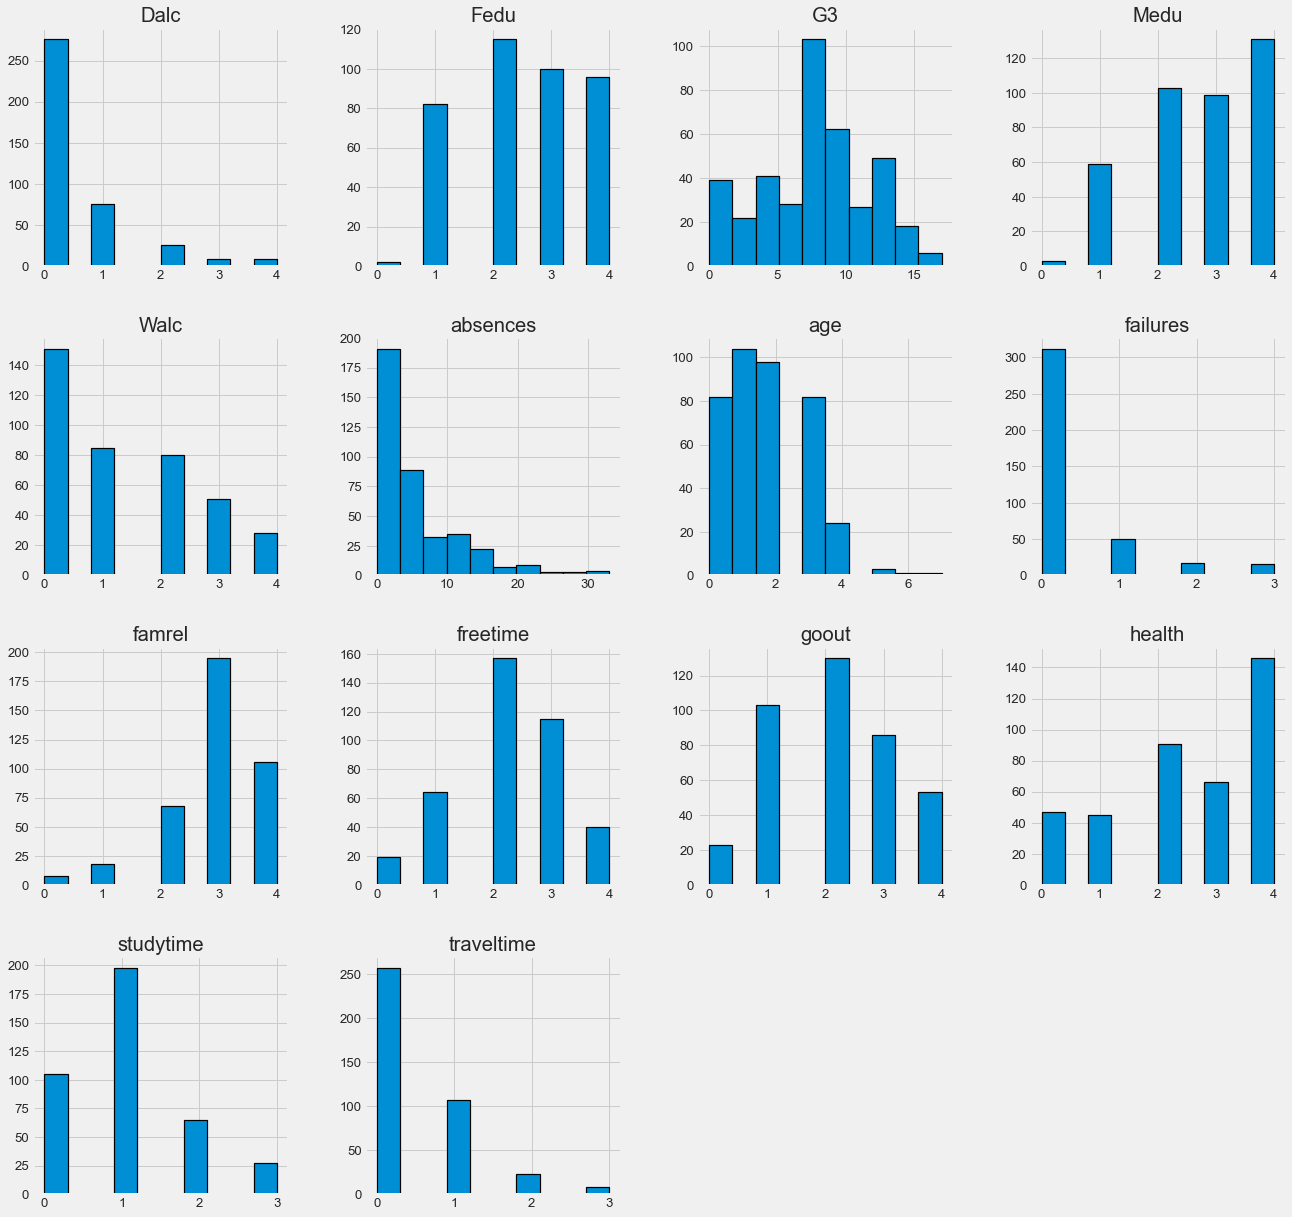

In [144]:
# Visulazing the distibution of the data for every feature
student.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

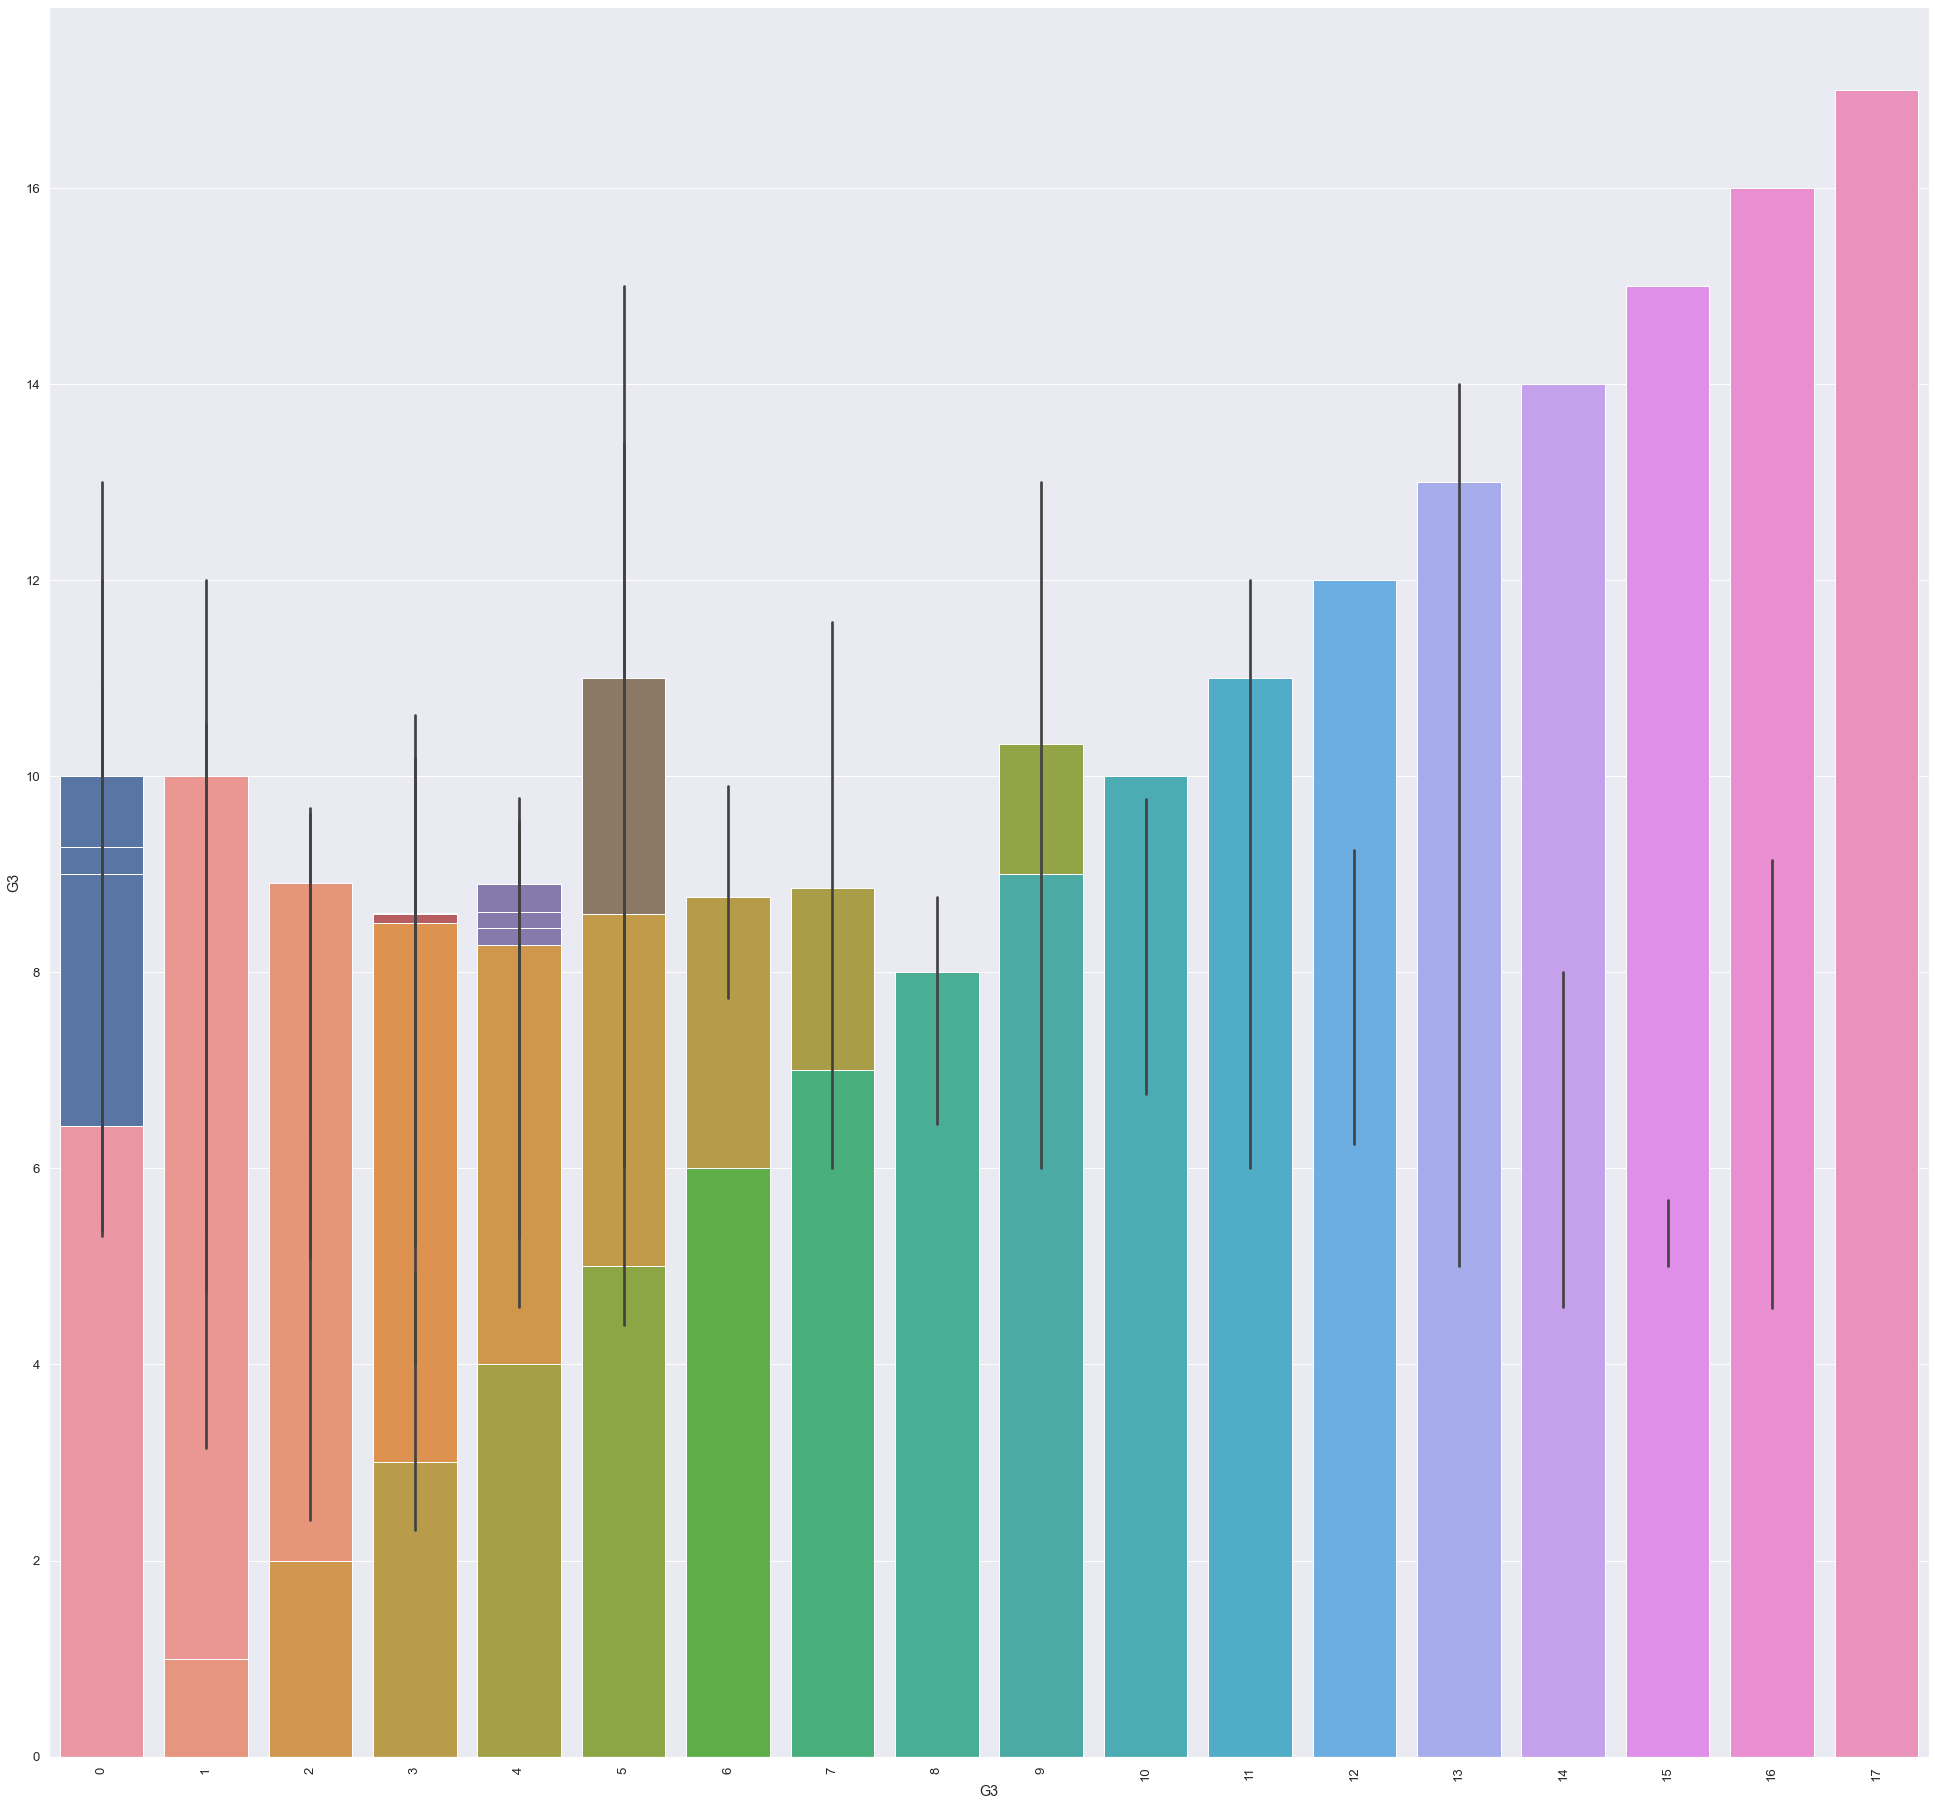

In [145]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(student.columns, 1):
    
    g = sns.barplot(x=f"{column}", y='G3', data=student)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('G3')
    plt.xlabel(f'{column}')

### 3. Correlation Matrix

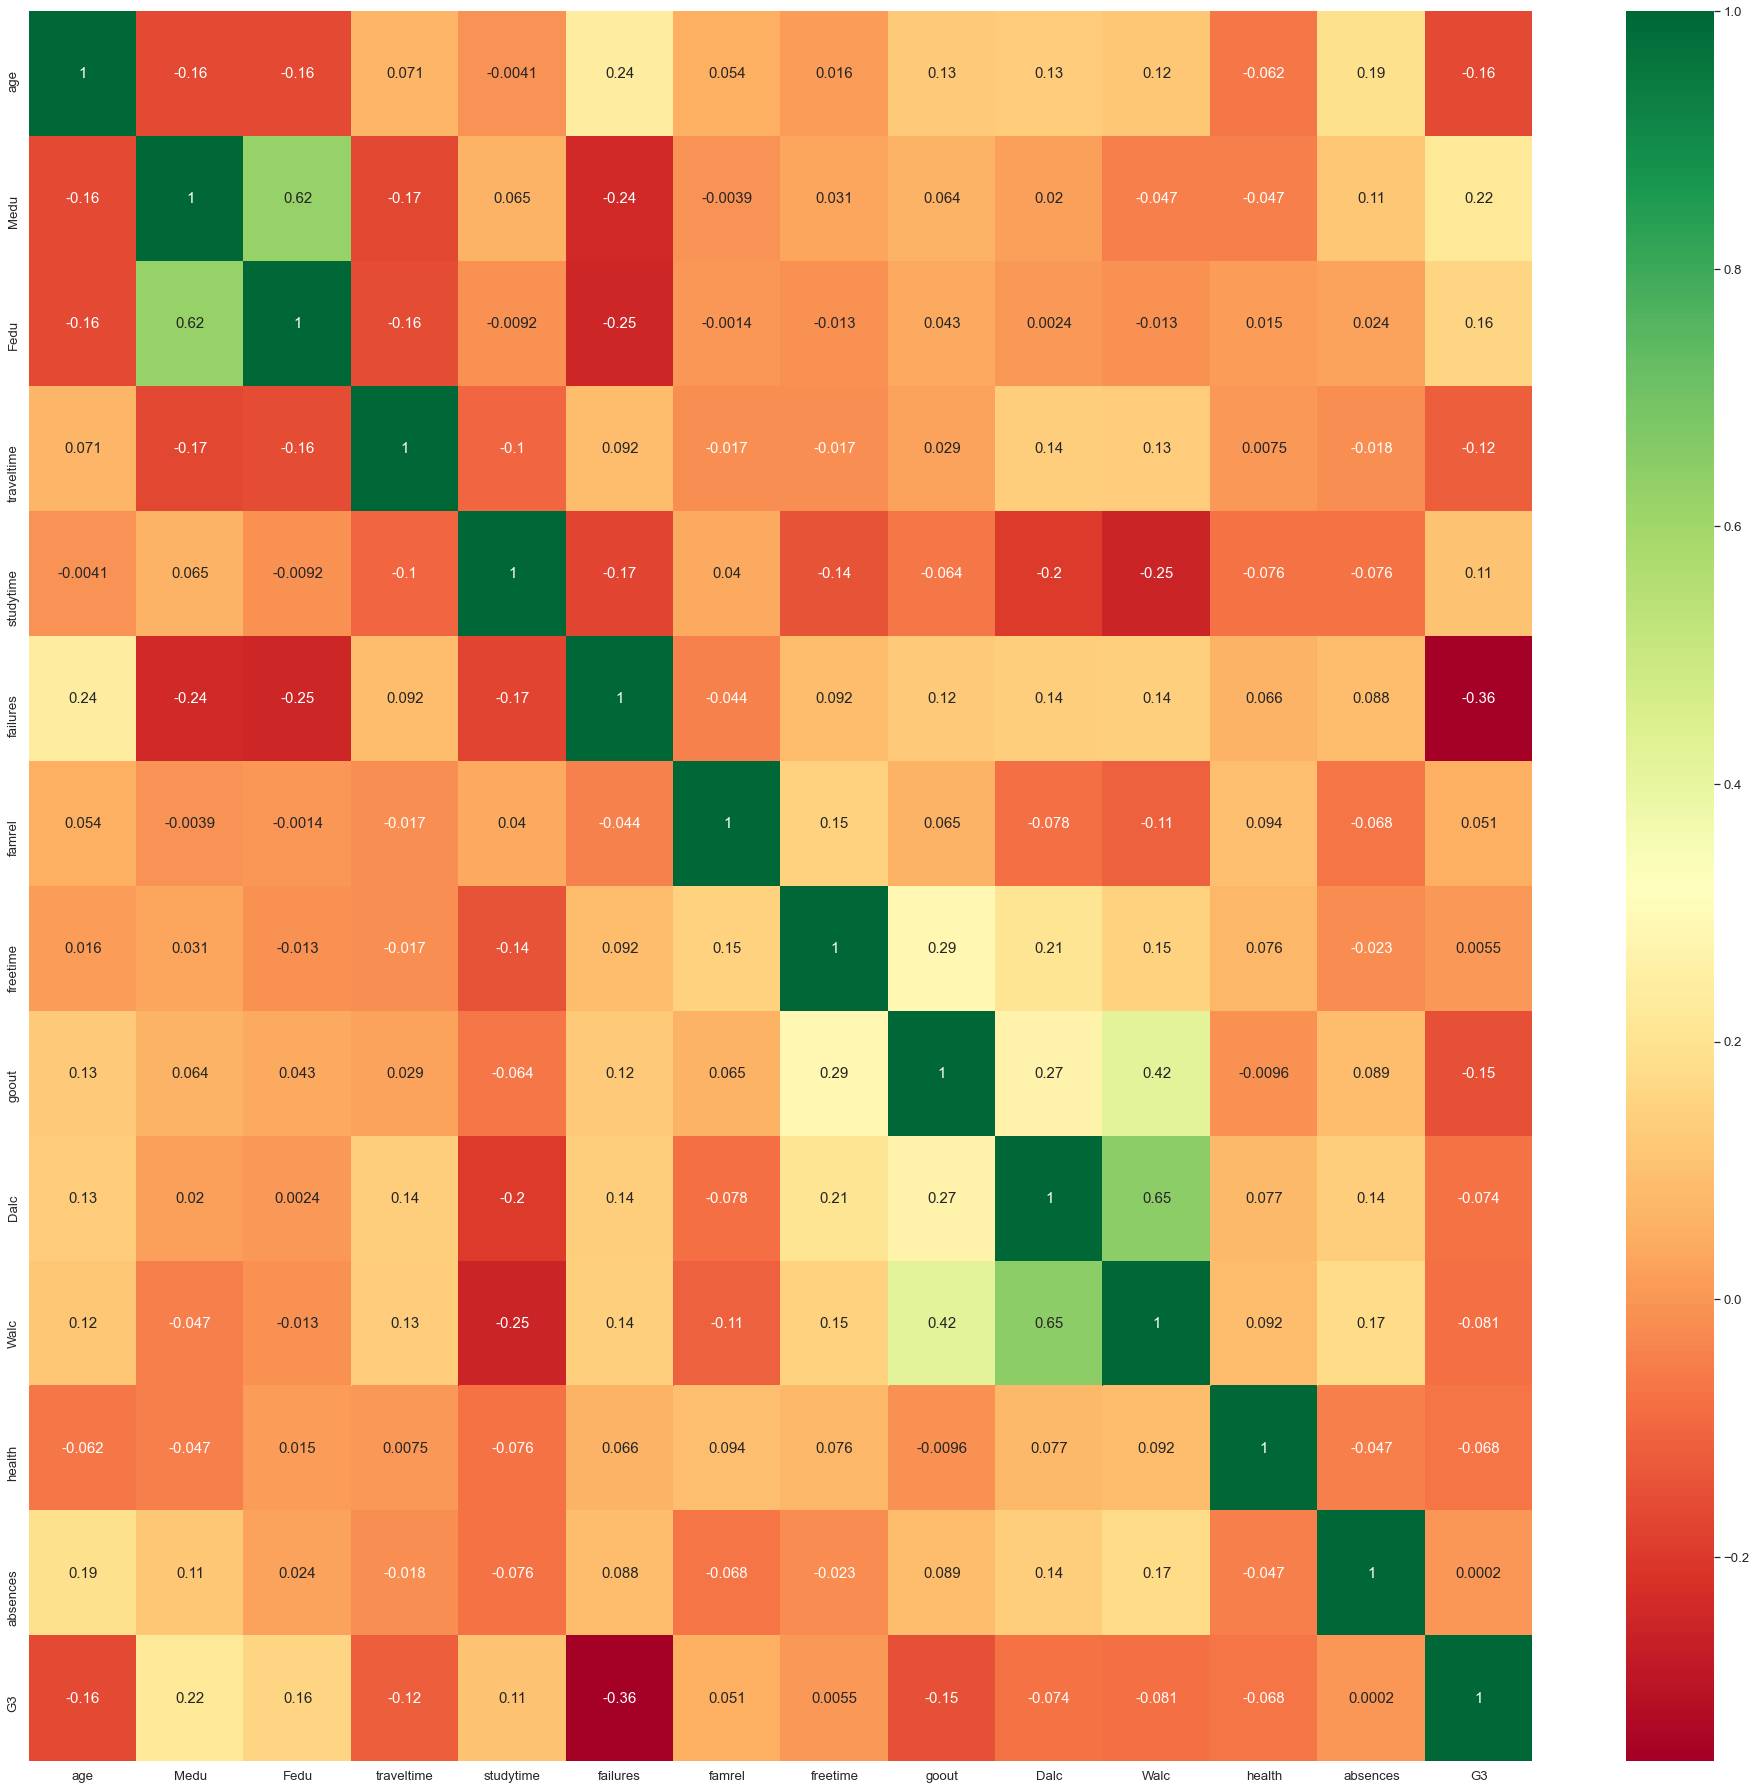

In [146]:
plt.figure(figsize=(30, 30))
sns.heatmap(student.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

### 4. Data Processing

In [147]:
categorical_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [148]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    student[column] = label.fit_transform(student[column])

In [149]:
X = student.drop('G3', axis=1)
y = student.G3

### 5. Applying machine learning algorithms

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Confusion Matrix: 
 [[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  

### 5. 2. Decision Tree Classifier Hyperparameter tuning

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

# grid_search_cv.fit(X_train, y_train)

In [154]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [155]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [156]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.3406

Confusion Matrix: 
 [[24  0  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  4  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  2  3  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 11  0  3  4  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  7  0  3  7  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  4  0 21  9  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  3  0  3 30  2  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  3  0  2 10  4  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  2  0  8 11  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  5  9  1  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  3  9  2  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  6  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  7  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  

In [157]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(student.columns)
features.remove("G3")

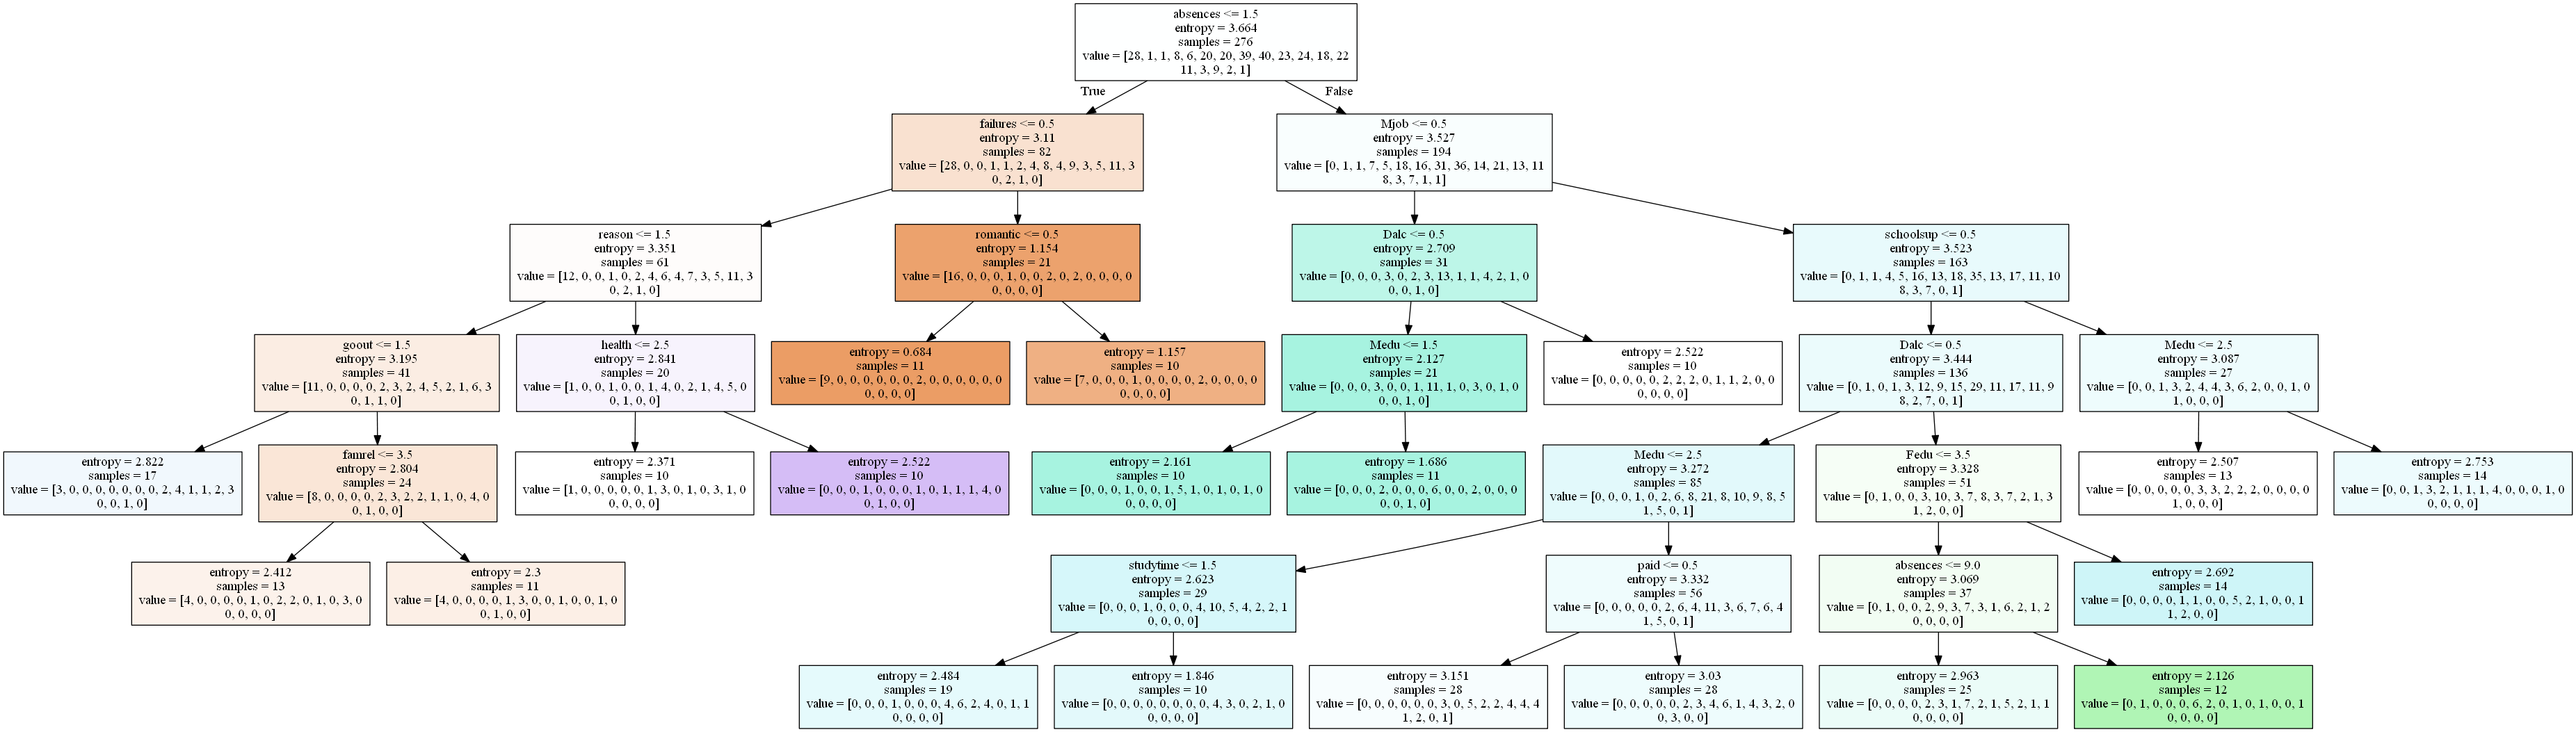

In [158]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())